In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments_df = pd.read_csv("../data/skillshare_2022_comments.csv", index_col=0)
comments_df.head()

,id,comment,user_id,commentable_id,commentable_type,origin_id,origin_type,num_up,num_down,score,is_deleted,is_from_email,update_time,create_time,is_author_subscribed,is_reported,reported_by_uid
0,1098793,<p>This is a gorgeous pattern. Wow! So inspiri...,6304085,421199,Project,421199,Project,0,0,NaN,NaN,False,2022-01-01 01:12:43,2022-01-01 01:12:43,True,NaN,NaN
1,1098810,<p>Wow ! Love it !! Waiting to see more of the...,15131719,421392,Project,421392,Project,1,0,1.0,NaN,False,2022-01-11 01:28:58,2022-01-01 03:19:55,True,NaN,NaN
2,1098820,"Thankyou. Yes, I do struggle with those palm p...",988232,1096435,Comment,419898,Project,0,0,NaN,NaN,False,2022-01-01 04:51:03,2022-01-01 04:51:03,True,NaN,NaN
3,1099525,"<p>Hi Anastasia, I'm happy to help! Spoonflow...",4218757,303432,Discussion,303432,Discussion,0,0,NaN,NaN,False,2022-01-03 13:22:02,2022-01-03 13:22:02,True,NaN,NaN
4,1099526,"<p>Hi Sally, I'm happy to help! So just to do...",4218757,303399,Discussion,303399,Discussion,0,0,NaN,NaN,False,2022-01-03 13:23:38,2022-01-03 13:23:38,True,NaN,NaN


In [3]:
totaled_comments = comments_df.user_id\
    .value_counts()\
    .reset_index()\
    .rename(columns={"user_id":"total_comments",
                     "index":"user_uid"})

totaled_comments

,user_uid,total_comments
0,3900428,520
1,4218757,448
2,2782080,407
3,2360844,333
4,2392418,269
...,...,...
4773,14297714,1
4774,25274353,1
4775,24942496,1
4776,24691697,1


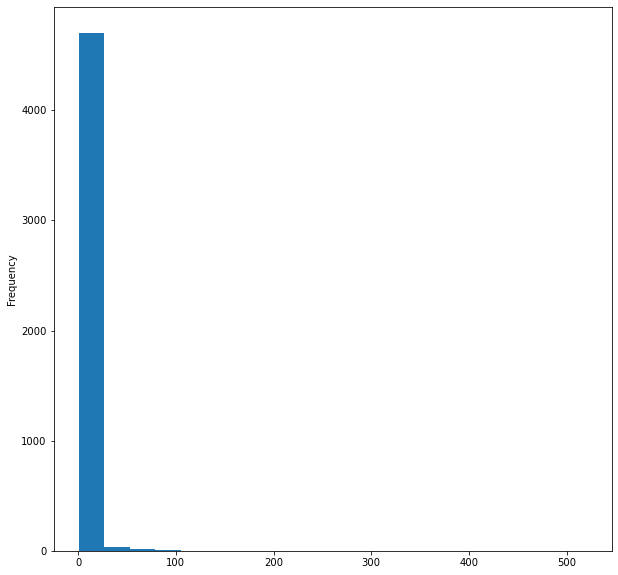

In [4]:
plt.figure(figsize=(10,10))
totaled_comments.total_comments\
    .plot.hist(bins=20)
plt.show()

In [5]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
combined = pd.merge(combined, totaled_comments, on="user_uid", how="outer")
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_comments
0,23692129,2022-01-01 00:00:02,0.0,True,2.0,2.0,0.0,10.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,23674285,2022-01-01 00:00:27,0.0,False,-1.0,-1.0,0.0,2.0,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,16119588,2022-01-01 00:01:19,1.0,False,1.0,5.0,0.0,10.0,30.0,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,23693101,2022-01-01 00:01:42,0.0,False,2.0,2.0,0.0,16.0,55.0,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,23692349,2022-01-01 00:02:04,1.0,False,2.0,2.0,0.0,16.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
totaled_comments_with_na = combined.total_comments\
    .value_counts(dropna=False)

totaled_comments_with_na

NaN      472667
1.0        3054
2.0         782
3.0         301
4.0         160
          ...  
84.0          1
76.0          1
73.0          1
72.0          1
120.0         1
Name: total_comments, Length: 76, dtype: int64

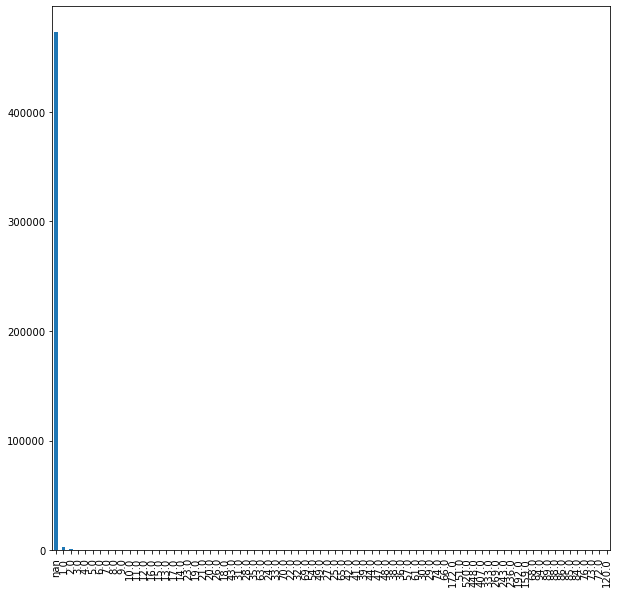

In [7]:
plt.figure(figsize=(10,10))
totaled_comments_with_na.plot.bar()
plt.show()

In [8]:
# VADER SENTIMENT SCORING
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Remove HTML tags
comments_df.comment = comments_df.comment.str.replace("<p>", "").replace("</p>", "")
sentiment_analyzer = SentimentIntensityAnalyzer()

def compound_sent_score(sentence):
    'Return sentiment scores as dict (+, -, neutral, compound)'
    return sentiment_analyzer.polarity_scores(str(sentence))

vader = comments_df.comment.apply(compound_sent_score)

# Expand dict to create rows, then merge with original DF
vader = pd.json_normalize(vader)
comments_df = pd.merge(comments_df, vader, left_index=True, right_index=True)
comments_df

,id,comment,user_id,commentable_id,commentable_type,origin_id,origin_type,num_up,num_down,score,...,is_from_email,update_time,create_time,is_author_subscribed,is_reported,reported_by_uid,neg,neu,pos,compound
0,1098793,This is a gorgeous pattern. Wow! So inspiring!...,6304085,421199,Project,421199,Project,0,0,NaN,...,False,2022-01-01 01:12:43,2022-01-01 01:12:43,True,NaN,NaN,0.000,0.417,0.583,0.8550
1,1098810,Wow ! Love it !! Waiting to see more of these ...,15131719,421392,Project,421392,Project,1,0,1.0,...,False,2022-01-11 01:28:58,2022-01-01 03:19:55,True,NaN,NaN,0.000,0.575,0.425,0.8713
2,1098820,"Thankyou. Yes, I do struggle with those palm p...",988232,1096435,Comment,419898,Project,0,0,NaN,...,False,2022-01-01 04:51:03,2022-01-01 04:51:03,True,NaN,NaN,0.200,0.610,0.190,0.1779
3,1099525,"Hi Anastasia, I'm happy to help! Spoonflower ...",4218757,303432,Discussion,303432,Discussion,0,0,NaN,...,False,2022-01-03 13:22:02,2022-01-03 13:22:02,True,NaN,NaN,0.063,0.824,0.113,0.5550
4,1099526,"Hi Sally, I'm happy to help! So just to doubl...",4218757,303399,Discussion,303399,Discussion,0,0,NaN,...,False,2022-01-03 13:23:38,2022-01-03 13:23:38,True,NaN,NaN,0.042,0.813,0.145,0.8217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,1153790,"Yes, thank you. I like how you go straight to ...",26141004,1153678,Comment,450603,Project,1,0,1.0,...,False,2022-06-23 13:52:38,2022-06-23 07:12:40,True,NaN,NaN,0.000,0.534,0.466,0.8225
16421,1153791,"Thank you so much. I need a lot of practice, a...",26141004,1153676,Comment,450603,Project,1,0,1.0,...,False,2022-06-23 13:52:54,2022-06-23 07:14:00,True,NaN,NaN,0.000,0.648,0.352,0.8268
16422,1153792,Hi Jenny! I'm not completely sure what could h...,7676581,313769,Discussion,313769,Discussion,0,0,NaN,...,False,2022-06-23 07:20:59,2022-06-23 07:20:59,True,NaN,NaN,0.094,0.833,0.074,0.1907
16423,1153797,reply</p>,23390131,324542,Discussion,324542,Discussion,0,0,NaN,...,False,2022-06-23 07:28:57,2022-06-23 07:28:57,True,NaN,NaN,0.000,1.000,0.000,0.0000


In [9]:
# Groupby user id (across multiple comments)
# Agg by mean
mean_comment_scores = comments_df\
    .groupby("user_id")\
    .mean()[["neg", "neu", "pos", "compound"]]\
    .reset_index()

startsc_df = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
startsc_df

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475443,26284161,2022-05-31 23:56:47,0,False,2,2,0,0,35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475444,26259150,2022-05-31 23:56:53,0,False,2,2,0,17,227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475445,26284159,2022-05-31 23:57:46,0,True,1,5,0,17,227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475446,9742534,2022-05-31 23:58:00,0,True,1,5,0,10,30,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Merge with already cleaned DF that has target column
merged = pd.merge(mean_comment_scores, startsc_df, left_on="user_id", right_on="user_uid")
merged

,user_id,neg,neu,pos,compound,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,324662,0.0000,0.759000,0.241000,0.76920,324662,2022-02-09 01:03:14,1,True,2,...,429.0,1678.0,5672.0,10992.0,6038.0,8784.0,7290.0,7932.0,8310.0,4589.0
1,425100,0.0000,0.653000,0.347000,0.89340,425100,2022-05-05 19:26:18,0,True,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,430944,0.0490,0.590333,0.360667,0.67310,430944,2022-05-10 16:22:34,1,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,449866,0.1955,0.765000,0.039500,-0.14030,449866,2022-01-10 01:59:46,1,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,468370,0.0000,0.874000,0.126000,0.38180,468370,2022-04-04 19:14:26,1,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,26280713,0.0000,0.508000,0.492000,0.44040,26280713,2022-05-31 19:26:18,1,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2777,26281133,0.0000,0.432000,0.568000,0.68365,26281133,2022-05-31 19:44:21,0,True,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2778,26281278,0.0000,1.000000,0.000000,0.00000,26281278,2022-05-31 23:00:35,0,False,2,...,614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,26282921,0.1200,0.682000,0.198000,0.33430,26282921,2022-05-31 22:07:28,0,False,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Convert to long form for viz
melted = merged.melt(
    id_vars=["user_id", "success"], 
    value_vars=["neg", "neu", "pos", "compound"], 
    value_name="score", 
    var_name="score_type")

melted

,user_id,success,score_type,score
0,324662,1,neg,0.00000
1,425100,0,neg,0.00000
2,430944,1,neg,0.04900
3,449866,1,neg,0.19550
4,468370,1,neg,0.00000
...,...,...,...,...
11119,26280713,1,compound,0.44040
11120,26281133,0,compound,0.68365
11121,26281278,0,compound,0.00000
11122,26282921,0,compound,0.33430


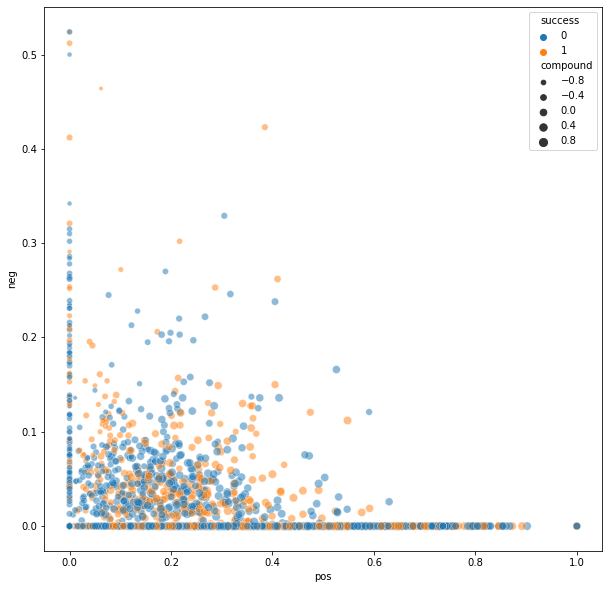

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=merged,
    x="pos",
    y="neg",
    size="compound",
    alpha=0.5,
    hue="success"
)
plt.show()

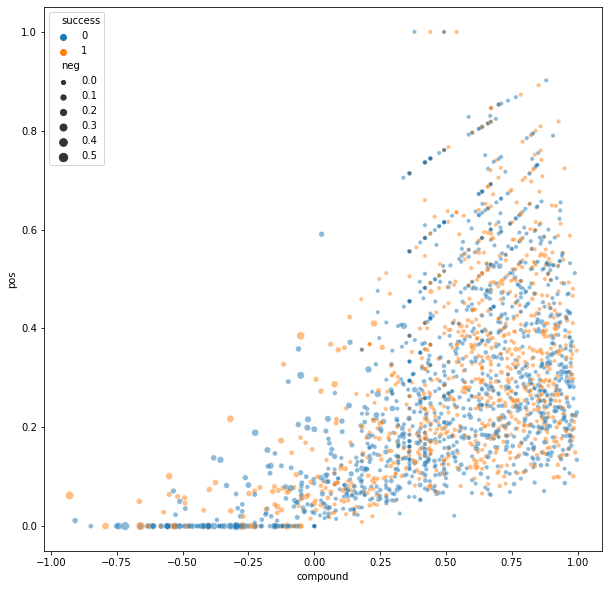

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=merged,
    x="compound",
    y="pos",
    size="neg",
    alpha=0.5,
    hue="success"
)
plt.show()

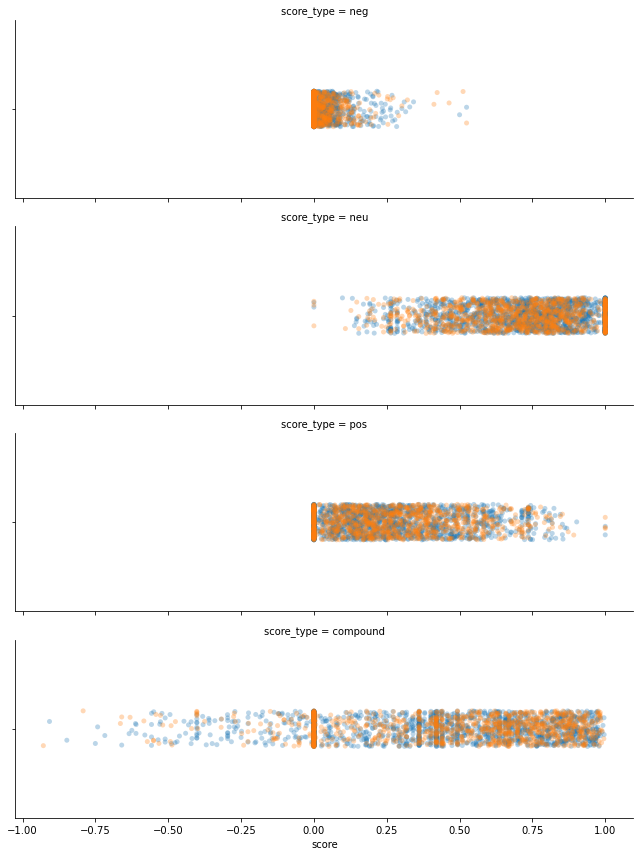

In [14]:
g = sns.FacetGrid(
    melted,
    row="score_type", 
    hue="success",
    height=3, aspect=3
)
g.map_dataframe(sns.stripplot, x="score", alpha=0.3)
plt.show()